In [1]:
'''

GDrive link for video :- https://drive.google.com/drive/folders/11Vxcn1Xj513ZsZeTMwj-gT777CxKbkrG?usp=sharing

'''


In [ ]:
'''

All ChatGpt Prompts are,if any, written at the top of each cell starting with ##
The rest of the general short comments are written by using #.
For the long comments I have used ('''    ''')

'''


In [ ]:
'''
Understanding of the problem statement:
In the given problem we are analyzing and working on a dataset given by a bank.Banks often starts various campaigns in order to
enroll people in a particular program/to make them take a particular action like making a deposit,etc.
Different campaigns will work for different types of people, and our aim is to find out the campaigns that work
for a particular group of people. By making a campaign work is to mean that the campaign has achieved the desired outcome.
Our aim is to make a model to do the same with the help of the data given.
'''

In [ ]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import random
from pyasn1_modules.rfc3161 import Accuracy

In [2]:
data_frame = pd.read_csv('bank.csv') #Storing the data in a data frame 

In [3]:
data_frame.head() #Viewing the data frame 


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


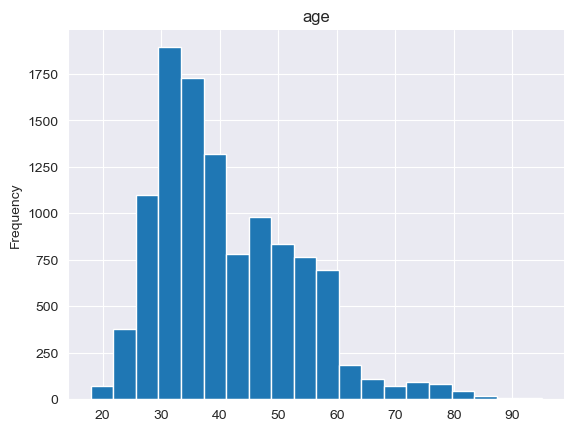

In [4]:
## How to plot Histogram of a Data Frame 
#Plotting the distribution of age 
data_frame['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
'''
Most of the variables above are not numbers and thus we can use encoding for the same
Encoding scheme :=

1.Marital Status -->
  Married == 1
  Single == 0
  Divorced == -1

2.Education -->
  Primary == 1
  Secondary == 2
  Tertiary == 3
  Unknown == 0

3.Deposit -->
  Yes == 1
  No == 0

4.Housing -->
  Yes == 1
  No == 0

5.Loan -->
  Yes == 1
  No == 0

6.Contact -->
  unknown == 0
  cellular == 1
  telephone == 0.5

7.poutcome -->
  unknown == 0
  other == 10
  success == 1000
  failure == -1000
8.Default -->
  yes == 1
  no == 0

9.job -->
  technician == 1
  services == -1
  management == 2
  retired == -2
  blue-collar == 3
  unemployed == -3
  admin == 4
  self-employed == -4
  entrepreneur == 5
  unknown == -5
  student == 6
  housemaid == -6
10.month -->
  jan == 1
  feb == 2
  mar == 3
  apr == 4
  may == 5
  jun == 6
  jul == 7
  aug == 8
  sep == 9
  oct == 10
  nov == 11
  dec == 12

'''

In [ ]:
'''
Variables which we can use are :-
1. Age
2. Job
3. Marital
4. Education
5. Default
6. Balance
7. Housing
8. Loan
9. Contact
10. Duration
11. Campaign
12. Pdays
13. Previous
14. Poutcome
15. Deposit
16. Day
17. Month
Because all of them can be encoded into numbers and thus used for evaluating the model 
'''

In [5]:
## How to check the different entries within a column in a data frame 
#Code to check the number of different entries in a given class
#I have used the below code to do the encoding presented above
current = data_frame['month']
count = {}
for item in current:
  if item in count:
    pass
  else:
    count[item] = 1
sum = 0
for key,value in count.items():
  sum += value
print(sum)
print(count)

12
{'may': 1, 'jun': 1, 'jul': 1, 'aug': 1, 'oct': 1, 'nov': 1, 'dec': 1, 'jan': 1, 'feb': 1, 'mar': 1, 'apr': 1, 'sep': 1}


In [ ]:
##How to do the encoding of data of columns in a data frame 
#The encoding is done here
encoded_df = data_frame.copy()


#Defining the encoding scheme as a dictionary
encoding_scheme = {
    'marital' : {
        'married':1,
        'single':0,
        'divorced':-1
    },
    'education':{
        'primary':1,
        'secondary':2,
        'tertiary':3,
        'unknown':0
    },

    'deposit':{
        'yes':1,
        'no':0
    },

    'housing':{
        'yes':1,
        'no':0,

    },

    'loan':{
        'yes':1,
        'no':0
    },

    'contact':{
        'unknown':0,
        'cellular':1,
        'telephone':0.5
    },
    'poutcome':{
        'unknown':0,
        'other':10,
        'success':1000,
        'failure': -1000,
    },
    'default':{
        'yes':1,
        'no':0
    },
    'job':{
        'technician' : 1,
        'services' : -1,
        'management' : 2,
        'retired' : -2,
        'blue-collar' : 3,
        'unemployed' :-3,
        'admin.' : 4,
        'self-employed' : -4,
        'entrepreneur' : 5,
        'unknown' : -5,
        'student' : 6,
        'housemaid' : -6,
    },
    'month':{
        'jan' : 1,
        'feb' : 2,
        'mar' : 3,
        'apr' : 4,
        'may' : 5,
        'jun' : 6,
        'jul' : 7,
        'aug' : 8,
        'sep' : 9,
        'oct' :10,
        'nov' : 11,
        'dec' : 12,
    }

  }
encoded_data_frame = encoded_df.replace(encoding_scheme) #Doing the encoding 

In [89]:
encoded_data_frame.head() #Viewing the encoded data frame 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,4,1,2,0,2343,1,0,0.0,5,5,1042,1,-1,0,0,1
1,56,4,1,2,0,45,0,0,0.0,5,5,1467,1,-1,0,0,1
2,41,1,1,2,0,1270,1,0,0.0,5,5,1389,1,-1,0,0,1
3,55,-1,1,2,0,2476,1,0,0.0,5,5,579,1,-1,0,0,1
4,54,4,1,3,0,184,0,0,0.0,5,5,673,2,-1,0,0,1


11162


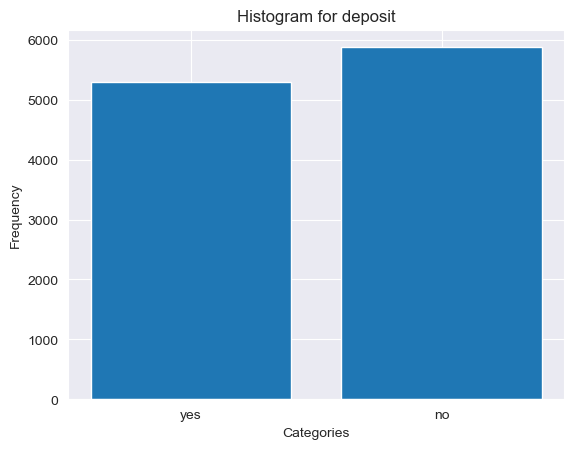

In [7]:
#How to plot Histogram for a dictionary in Python
#Block of code to check if the given code is balanced or not
#Note : Professor later updated the target variable to deposit from poutcome and thus the analysis is done on the same

current_data = data_frame['deposit'] #Choosing column of interest 
count = {} #Dictionary to store values 
#Iterating through the column and updating the dictionary 
for item in current_data:
  if item in count:
    count[item] += 1
  else:
    count[item] = 1

#Extracting the values of Keys and Values
categories = list(count.keys())
frequency = list(count.values())

#Finding out the total values 
total = 0
total_values = list(count.values()) 

for val in total_values:
  total += val
print(total)

#Plotting the same 
plt.bar(categories,frequency)
plt.xlabel('Categories')
plt.ylabel('Frequency')

plt.title('Histogram for deposit')
plt.show()


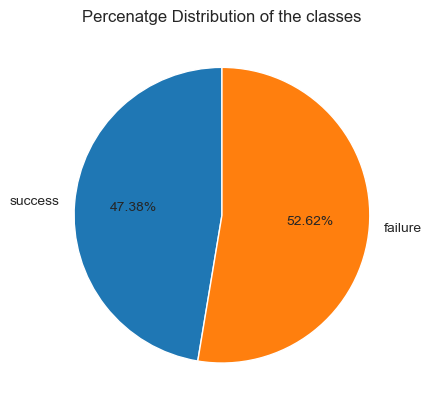

In [8]:
##Generate to me code to plot a Pie Chart for 2 variables
#Declaring variables and doing the calculations 
success = count['yes']
failure = count['no']
success *= 100/total
failure *= 100/total

percentages = [success,failure]
labels = ['success','failure']
 #Plotting the Pie chart 
plt.pie(percentages,labels = labels, autopct = '%1.2f%%',startangle = 90)
plt.title('Percentage Distribution of the classes')
plt.show()

In [ ]:
'''
 From the above data Visualizations and Analysis we can easily conclude that the given classes are balanced.
 A balanced dataset should be having approximately the same number of elements across different classes.
 In the above case, we are having approximately the same number of elements in each class 
 ==> Success : 5289 and Failure : 5873
 Thus we can easily conclude that the given classes are balanced.
'''

In [ ]:
##Give me metrics that can used for a model which predicts a binary target variable from a given set of variables
'''
The metrics that I will be using to get the results will be :-

--> Accuracy    :- Accuracy helps us to figure out the corectness of our model and thus will bw crucial in determining the overall efficiency of our model :
--> F1 Score    :- The F1 score helps us to figure out the trade off between Precision and Recall
--> Precision   :- I will be using precision metric so as to get an idea of true positives, which in                    this case is of upmost importance as we are looking what all campaigns will work\                    on a certain group of people
--> Recall      :- Recall will help us to figure out the number of false positive cases
'''

In [ ]:
##Give me the importance of Normalizing a given data set 
#Question 3
'''

We need to Normalize the given data for better results as Normalization can affect SVM and KNN algorithms which comes up later
in the assignment.
Normalization is important as we are having parameters of different range and thus we need to Normalize them so that
they won't bias the results.
Thus we can capture the essence of each variable to the final output without any bias of data range.

Here I have not combined any of the variables, and I have used the discrete variables as such 
Apparently poutcome is looking noisy, but it is later revealed that we can even use poutcome to do the prediction with over 80 percent accuracy
'''

In [10]:
encoded_data_frame #Viewing the encoded data frame 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,4,1,2,0,2343,1,0,0.0,5,5,1042,1,-1,0,0,1
1,56,4,1,2,0,45,0,0,0.0,5,5,1467,1,-1,0,0,1
2,41,1,1,2,0,1270,1,0,0.0,5,5,1389,1,-1,0,0,1
3,55,-1,1,2,0,2476,1,0,0.0,5,5,579,1,-1,0,0,1
4,54,4,1,3,0,184,0,0,0.0,5,5,673,2,-1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,3,0,1,0,1,1,0,1.0,20,4,257,1,-1,0,0,0
11158,39,-1,1,2,0,733,0,0,0.0,16,6,83,4,-1,0,0,0
11159,32,1,0,2,0,29,0,0,1.0,19,8,156,2,-1,0,0,0
11160,43,1,1,2,0,0,0,1,1.0,8,5,9,2,172,5,-1000,0


In [11]:
##Generate to me a code to do the Min-Max Scaling 
from sklearn.preprocessing import MinMaxScaler #Importing the MinMaxScaler function 
#Defining the Min-Max Scaler function to do the scaling :
def min_max(df,columns):
  scaler = MinMaxScaler()
  df_scaled = df.copy()
  df_scaled[columns] = scaler.fit_transform(df_scaled[columns])
  return df_scaled

In [12]:
#Selecting the columns to be scaled and doing the scaling part
scaled_df = min_max(encoded_data_frame,['job','month','day','age','marital','education','default','balance','housing','loan','contact','duration','campaign','pdays','previous','poutcome','deposit']) #


In [13]:
scaled_df #Viewing the scaled dataframe 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0.532468,0.833333,1.0,0.666667,0.0,0.104371,1.0,0.0,0.0,0.133333,0.363636,0.268110,0.000000,0.000000,0.000000,0.5,1.0
1,0.493506,0.833333,1.0,0.666667,0.0,0.078273,0.0,0.0,0.0,0.133333,0.363636,0.377675,0.000000,0.000000,0.000000,0.5,1.0
2,0.298701,0.583333,1.0,0.666667,0.0,0.092185,1.0,0.0,0.0,0.133333,0.363636,0.357566,0.000000,0.000000,0.000000,0.5,1.0
3,0.480519,0.416667,1.0,0.666667,0.0,0.105882,1.0,0.0,0.0,0.133333,0.363636,0.148750,0.000000,0.000000,0.000000,0.5,1.0
4,0.467532,0.833333,1.0,1.000000,0.0,0.079851,0.0,0.0,0.0,0.133333,0.363636,0.172983,0.016129,0.000000,0.000000,0.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.194805,0.750000,0.5,0.333333,0.0,0.077773,1.0,0.0,1.0,0.633333,0.272727,0.065739,0.000000,0.000000,0.000000,0.5,0.0
11158,0.272727,0.416667,1.0,0.666667,0.0,0.086086,0.0,0.0,0.0,0.500000,0.454545,0.020882,0.048387,0.000000,0.000000,0.5,0.0
11159,0.181818,0.583333,0.5,0.666667,0.0,0.078091,0.0,0.0,1.0,0.600000,0.636364,0.039701,0.016129,0.000000,0.000000,0.5,0.0
11160,0.324675,0.583333,1.0,0.666667,0.0,0.077762,0.0,1.0,1.0,0.233333,0.363636,0.001805,0.016129,0.202339,0.086207,0.0,0.0


In [14]:
#Looking for Correlation among the given parameters
scaled_final = scaled_df.copy() #Making a copy of the data frame 
correlation_matrix = scaled_final.corr() #Figuring out the correlation
correlation_matrix #Displaying the correlation matrix

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
age,1.000000,-0.294998,0.141610,-0.199576,-0.011425,0.112300,-0.168700,-0.031418,-0.027762,-0.000762,0.069312,0.000189,-0.005278,0.002774,0.020169,0.045807,0.034901
job,-0.294998,1.000000,-0.027275,0.051329,-0.005052,-0.035004,0.121108,0.047016,-0.007023,-0.020904,-0.016890,-0.023289,0.003142,0.022678,0.016886,-0.035353,-0.017209
marital,0.141610,-0.027275,1.000000,-0.074160,-0.013950,0.026316,0.022530,0.019343,-0.024355,0.001393,0.032277,-0.035748,0.037285,-0.006591,0.008577,-0.011437,-0.068325
education,-0.199576,0.051329,-0.074160,1.000000,-0.015728,0.033630,-0.047730,-0.016820,0.140759,0.002419,0.034792,-0.001539,-0.018495,0.025268,0.033502,0.014189,0.075583
default,-0.011425,-0.005052,-0.013950,-0.015728,1.000000,-0.060954,0.011076,0.076434,-0.035709,0.017342,0.006561,-0.009760,0.030975,-0.036282,-0.035273,-0.009226,-0.040680
balance,0.112300,-0.035004,0.026316,0.033630,-0.060954,1.000000,-0.077092,-0.084589,0.027295,0.010467,0.063818,0.022436,-0.013894,0.017411,0.030805,0.028573,0.081129
housing,-0.168700,0.121108,0.022530,-0.047730,0.011076,-0.077092,1.000000,0.076761,-0.226392,-0.014770,-0.117996,0.035051,0.006660,0.064497,-0.000840,-0.148966,-0.203888
loan,-0.031418,0.047016,0.019343,-0.016820,0.076434,-0.084589,0.076761,1.000000,-0.006829,0.017269,0.005308,-0.001914,0.034722,-0.030416,-0.022668,-0.056595,-0.110580
contact,-0.027762,-0.007023,-0.024355,0.140759,-0.035709,0.027295,-0.226392,-0.006829,1.000000,-0.007943,0.127822,0.018000,-0.059258,0.227785,0.169919,-0.019504,0.249847
day,-0.000762,-0.020904,0.001393,0.002419,0.017342,0.010467,-0.014770,0.017269,-0.007943,1.000000,0.060431,-0.018511,0.137007,-0.077232,-0.058981,0.018383,-0.056326


In [15]:
#Question 4
'''
The test data should be representing the data in hand in order to get better results in implementing it in real world scenarios.
Since the data given here was balanced, the sampled data should also retain the approximate proportions while doing so.
To maintain the same proportions in the test data set, we can use stratified sampling in scikit learn.

Note that the sample is derived from data that is not normalized 
'''
#Splitting the given data frame into 2 dataframes based on the variable deposit
success_class = encoded_data_frame[encoded_data_frame['deposit'] == 1]
failure_class = encoded_data_frame[encoded_data_frame['deposit'] == 0]

#Fixing the proportion of samples to be drawn from each class
success_proportion = success/100
failure_proportion = failure/100

total_samples = 500 #The total number of samples to be drawn from each dataframe
success_samples = int(total_samples*success_proportion) + 1 #The number of samples to be drawn from the success class
failure_samples = int(total_samples*failure_proportion) #The number of samples to be drawn from failure class

#Generating a random seed
random_seed = random.randint(0,1000000000) #Generating a random seed
#Sampling from the data frames
sampled_success = success_class.sample(n = success_samples, random_state = random_seed)
sampled_failure = failure_class.sample(n = failure_samples, random_state = random_seed)
#Combining the data samples together into a single data frame
test_data = pd.concat([sampled_success,sampled_failure])
#Randomizig the combined data frame
test_data = test_data.sample(frac = 1, random_state = random_seed)
test_data #Viewing the data 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
10810,59,-2,1,0,0,178,1,0,0.5,11,7,330,2,-1,0,0,0
10370,37,-1,1,2,0,1,0,0,0.0,15,5,395,2,-1,0,0,0
9649,48,-4,1,3,0,16,1,1,1.0,18,11,214,1,-1,0,0,0
1611,45,2,1,3,0,506,0,0,1.0,23,4,229,2,-1,0,0,1
1698,35,1,1,2,0,518,1,0,1.0,30,4,616,1,-1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,59,-2,-1,2,0,1026,0,0,0.0,5,11,669,1,-1,0,0,1
10564,44,1,-1,2,0,314,1,0,0.0,12,8,18,1,651,1,1000,0
5607,54,2,1,3,0,2819,0,0,1.0,7,8,123,3,-1,0,0,0
7710,34,3,0,2,0,39,0,0,1.0,18,7,138,3,-1,0,0,0


1116


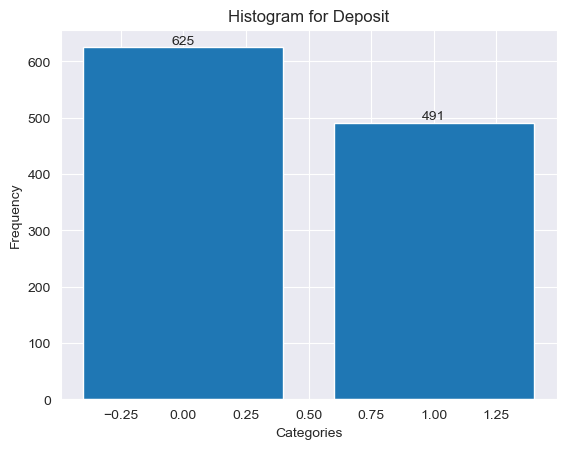

2232


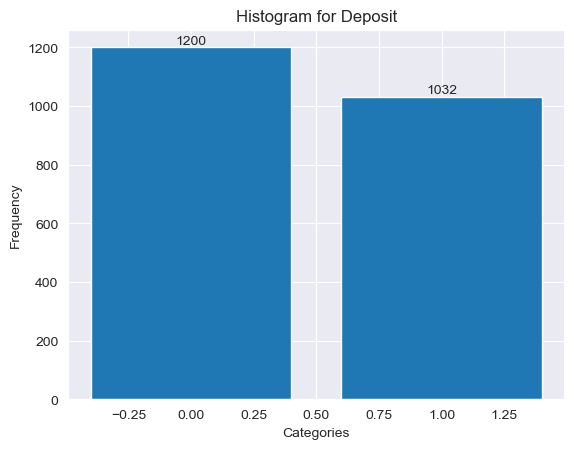

3349


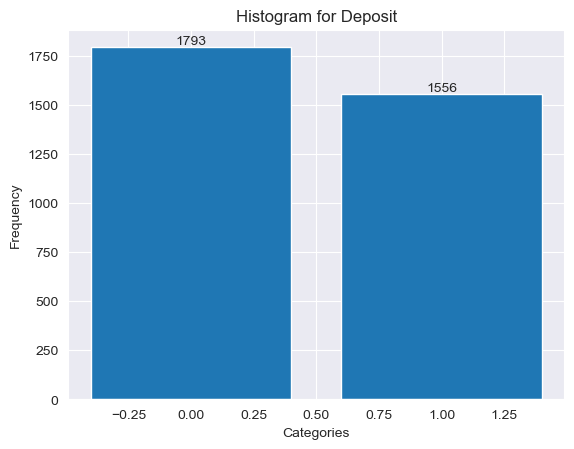

4465


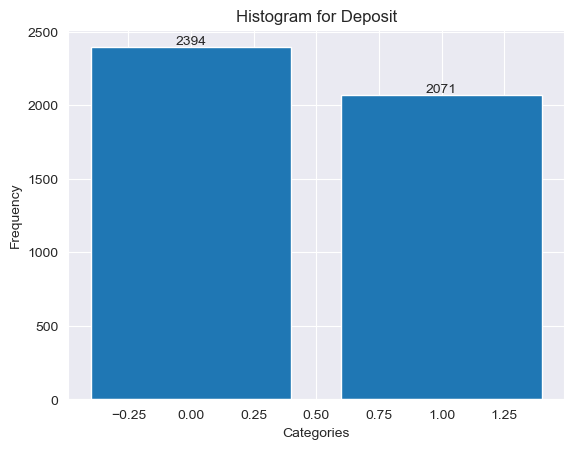

5581


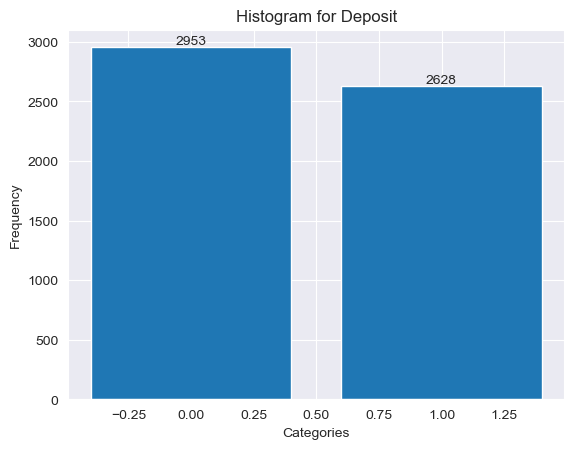

6697


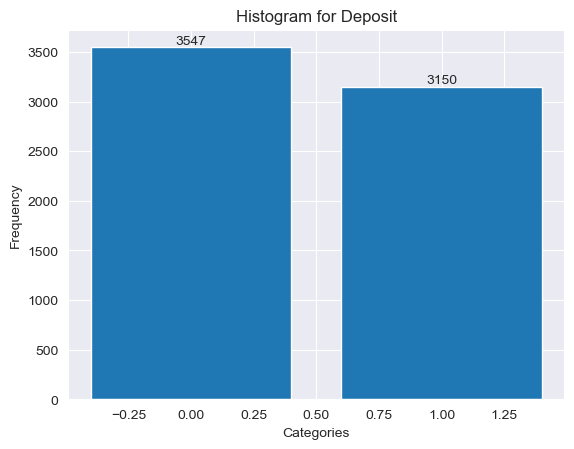

7813


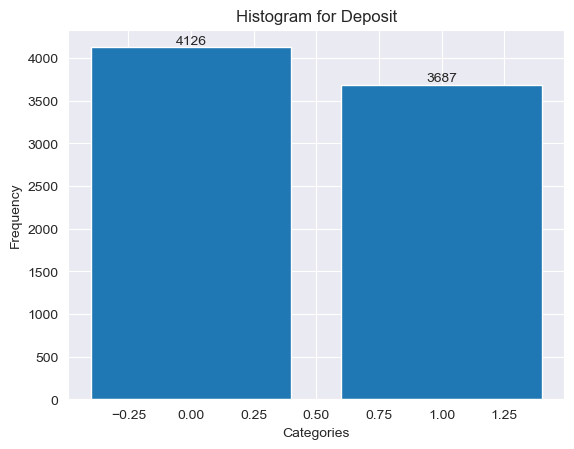

8930


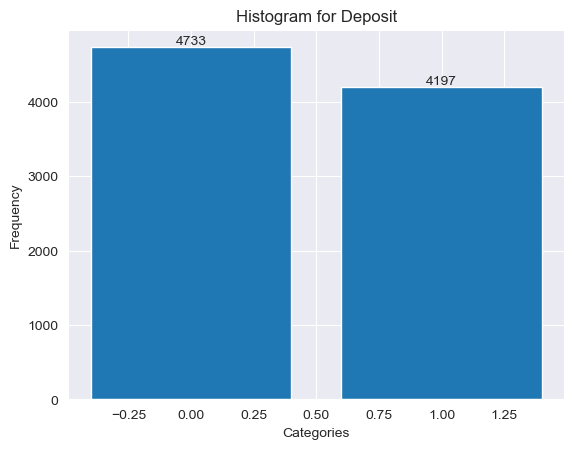

10046


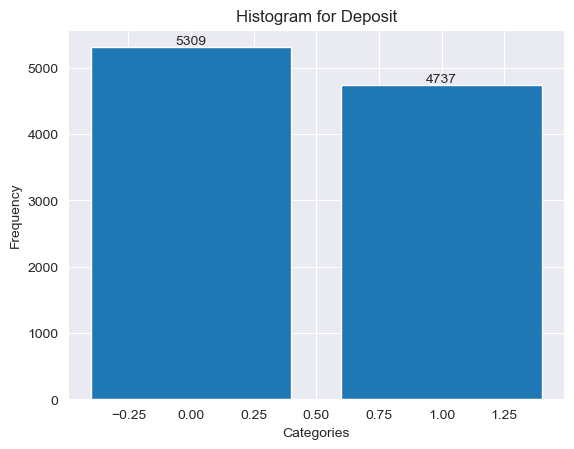

11162


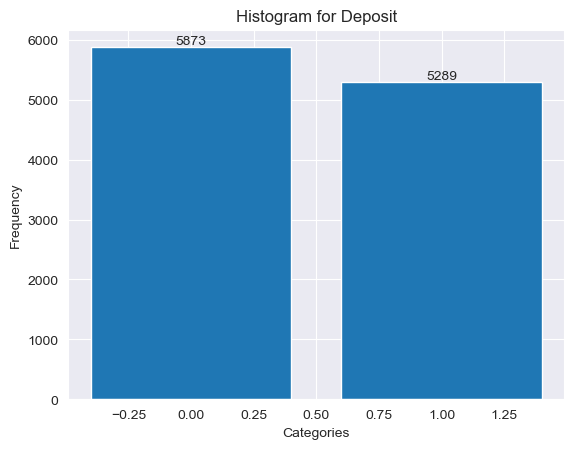

In [102]:
##How to display the frequency above each bar in a Histogram 
#Randomly sampling the data and then plotting the bar charts 
#Loop to loop through the data frame and sample out samples of different proportions each time 
for i in range(1,11):
    value = i/10 #Sampling Factor 
    sampled_df = encoded_data_frame.sample(frac = value, random_state = random_seed) #Sampled Data Frame 
    
    #variables to store the values 
    success = 0
    failure = 0
    
    #Dictionary to store the values 
    count = {}
    current_data = sampled_df['deposit']
    #Storing the values in the dictionary 
    for item in current_data:
      if item in count:
        count[item] += 1
      else:
        count[item] = 1
    
    #Extracting the values of Keys and Values
    categories = list(count.keys())
    frequency = list(count.values())
    
    #Finding out the total values 
    total = 0
    total_values = list(count.values()) 
    
    #Calculating the total values 
    for val in total_values:
      total += val
    print(total)
    bars = plt.bar(categories, frequency)

    # Adding frequency annotations on top of each bar
    for bar in bars:
        yval = bar.get_height()  # Get the height of each bar (frequency)
        plt.text(bar.get_x() + bar.get_width()/2, yval,  # Position text
                 str(yval), ha='center', va='bottom')  # Add text above the bar
    
    # Setting labels and title
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.title('Histogram for Deposit')
    plt.show()

In [ ]:
'''
From the above results we can see that the data sampled is balanced, which confirms our inference
'''

In [16]:
#Question 5
X = scaled_final.drop(columns = ['deposit']) #The input columns
y = scaled_final['deposit'] #Target column

In [17]:
## Using five-fold cross-validation (you can use GridSearchCV from scikit-learn) to find the reasonable hyperparameter settings for the following model types:
## a. RBF kernel SVM with kernel width and regularization as hyperparameters 
## b. Neural network with single ReLU hidden layer and Softmax output (hyperparameters: number of neurons, weight decay)
## c. Random forest (max tree depth, max number of variables per node)
#The above prompt was used for all 3 models mentioned in question

#RBF Kernel SVM
#Importing the libraries 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# RBF SVM model
svm_model = SVC(kernel='rbf')

# Scaling + SVM in a pipeline
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', svm_model)
])

# Defining the hyperparameter grid
param_grid_svm = {
    'svm__C': [0.1, 1, 10, 100],  # Regularization strength
    'svm__gamma': [0.001, 0.01, 0.1, 1]  # Kernel width
}

# GridSearchCV with 5-fold cross-validation
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X, y)
#Printing the results
print("Best SVM hyperparameters:", grid_search_svm.best_params_)
print("Best SVM CV accuracy:", grid_search_svm.best_score_)


Best SVM hyperparameters: {'svm__C': 10, 'svm__gamma': 0.01}
Best SVM CV accuracy: 0.7898273213623603


In [18]:
#The Neural Network
#Importing the libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [19]:
# Neural network model
nn_model = MLPClassifier(max_iter=1000, activation='relu', solver='adam')

# Defining the hyperparameter grid
param_grid_nn = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],  # Neurons in the hidden layer
    'alpha': [0.0001, 0.001, 0.01]  # Weight decay
}

# GridSearchCV with 5-fold cross-validation
grid_search_nn = GridSearchCV(nn_model, param_grid_nn, cv=5, scoring='accuracy')
grid_search_nn.fit(X, y)

print("Best Neural Network hyperparameters:", grid_search_nn.best_params_)
print("Best Neural Network CV accuracy:", grid_search_nn.best_score_)

Best Neural Network hyperparameters: {'alpha': 0.001, 'hidden_layer_sizes': (50,)}
Best Neural Network CV accuracy: 0.8013826891190629


In [20]:
#Random Forest Algorithm
#Importing required libraries 
from sklearn.ensemble import RandomForestClassifier

In [21]:
# Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Defining the hyperparameter grid
param_grid_rf = {
    'max_depth': [5, 10, 15, 20],  # Maximum depth of the tree
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider at each split
}

# GridSearchCV with 5-fold cross-validation
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X, y)

print("Best Random Forest hyperparameters:", grid_search_rf.best_params_)
print("Best Random Forest CV accuracy:", grid_search_rf.best_score_)

Best Random Forest hyperparameters: {'max_depth': 15, 'max_features': None}
Best Random Forest CV accuracy: 0.8143762429635621


In [ ]:
'''
Optimal Parameters :- 
1.RBF SVM ==> {'svm__C': 10, 'svm__gamma': 0.01}
2.NN ==> {'alpha': 0.001, 'hidden_layer_sizes': (50,)}
3.RF ==> Maximum Depth : 15
'''

In [22]:
##Check feature importance for each model to see if the same variables are important for each model. Read upon how to find feature importance 

#Question 6 Feature Importance of different models 
#Feature importance for RBF Kernel SVM 
#Importing the libraries
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [23]:
# Get the best SVM model
best_svm_model = grid_search_svm.best_estimator_

# Compute permutation importance
perm_importance = permutation_importance(best_svm_model, X, y, n_repeats=10, random_state=42)

# Display results in a sorted order
svm_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': perm_importance.importances_mean})
svm_importance_df = svm_importance_df.sort_values(by='Importance', ascending=False)
print(svm_importance_df)

      Feature  Importance
11   duration    0.199032
8     contact    0.027603
6     housing    0.023634
15   poutcome    0.021869
10      month    0.019208
0         age    0.013555
14   previous    0.008215
13      pdays    0.007848
12   campaign    0.007750
5     balance    0.007552
7        loan    0.006280
3   education    0.004990
9         day    0.003772
1         job    0.002930
2     marital    0.002446
4     default    0.001523


In [24]:
#Feature Importance for Neural Networks 
# Get the best neural network model
best_nn_model = grid_search_nn.best_estimator_

# Compute permutation importance
nn_perm_importance = permutation_importance(best_nn_model, X, y, n_repeats=10, random_state=42)

# Display results in a sorted order
nn_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': nn_perm_importance.importances_mean})
nn_importance_df = nn_importance_df.sort_values(by='Importance', ascending=False)
print(nn_importance_df)

      Feature  Importance
11   duration    0.215633
10      month    0.049597
8     contact    0.042645
15   poutcome    0.031769
6     housing    0.030998
9         day    0.021519
13      pdays    0.010778
0         age    0.010769
7        loan    0.007248
3   education    0.006531
12   campaign    0.006477
1         job    0.003888
5     balance    0.003476
14   previous    0.003100
2     marital    0.002876
4     default    0.001684


In [25]:
#Feature Importance of Random Forest 
# After fitting GridSearchCV with RandomForestClassifier
best_rf_model = grid_search_rf.best_estimator_

# Get feature importance
rf_feature_importance = best_rf_model.feature_importances_

# Display importance in a sorted order
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


      Feature  Importance
11   duration    0.362032
10      month    0.098562
15   poutcome    0.094781
9         day    0.080181
5     balance    0.073779
8     contact    0.064380
0         age    0.061823
6     housing    0.035576
13      pdays    0.031963
1         job    0.026533
12   campaign    0.023447
3   education    0.015454
14   previous    0.013682
2     marital    0.009555
7        loan    0.007359
4     default    0.000892


In [ ]:
'''
Some of the important observations :- 
1.In all of the 3 models, the parameter duration is of the most importance 
2.The parameter month, which I initially thought of having no influence in the final result,
  is having 2nd most contribution to 2 of the models  
3.Out of all the three models, the Random Forest model is having the maximum accuracy followed by Neural Network model 
'''

In [26]:
#Question 7 
'''
Here I am iterating through all of the features in the decreasing order of importance corresponding to a given model, adding one new feature at each iteration and then calculating the accuracy score for that iteration. Finally, I would extract the maximum possible accuracy from the accuracies obtained above and the number of features as well. 
Note : The features are added in the increasing order of importance 

'''
#Importing the libraries 
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold

In [27]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.inspection import permutation_importance

In [28]:
#Defining a function to do rfecv 
def perform_rfecv(model, X, y, step=1, cv_splits=5):
    """
    Perform RFECV on a given model to determine optimal features.

    Parameters:
    - model: The model to evaluate (e.g., SVC, RandomForestClassifier).
    - X: Feature matrix.
    - y: Target variable.
    - step: Number of features to remove at each iteration.
    - cv_splits: Number of cross-validation splits.

    Returns:
    - RFECV object with the optimal number of features.
    """
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    rfecv = RFECV(estimator=model, step=step, cv=cv, scoring='accuracy')
    rfecv.fit(X, y)

    print(f"Optimal number of features: {rfecv.n_features_}")
    print("Selected Features:", X.columns[rfecv.support_])

    return rfecv


In [30]:
#Checking for Random Forest
rf_model = RandomForestClassifier(max_depth=10)  # Example parameters
rfecv_rf = perform_rfecv(rf_model, X, y)

Optimal number of features: 9
Selected Features: Index(['age', 'balance', 'housing', 'contact', 'day', 'month', 'duration',
       'pdays', 'poutcome'],
      dtype='object')


In [ ]:
##Generate to me a code to iteratively add the columns to the data frame under testing from an array and to store the corresponding accuracy obtained in the same array 
#Trying to improve the accuracy by adding new parameters in the decreasing order of importance 
# RBF SVM model
svm_model = SVC(kernel='rbf')

# Scaling + SVM in a pipeline
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', svm_model)
])

# Define the hyperparameter grid
param_grid_svm = {
    'svm__C': [10],  # Regularization strength
    'svm__gamma': [0.01]  # Kernel width
}

# Array with features in decreasing order of importance 
feature_importances = [
    'duration', 'contact', 'housing', 'poutcome', 'month', 'age', 'previous',
    'pdays', 'campaign', 'balance', 'loan', 'education', 'day', 'job', 'marital', 'default'
]

# Initialize the dictionary to store accuracy for each number of features
accuracy_scores = {}

# Initialize an empty DataFrame to add features incrementally
X_new = pd.DataFrame()

# Loop through all the features in the order of importance
for i, feature in enumerate(feature_importances, 1):
    # Add the next most important feature
    X_new[feature] = X[feature]

    # Perform GridSearchCV with updated features
    grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring='accuracy')
    grid_search_svm.fit(X_new, y)
    
    # Store the best score in the dictionary with the number of features used
    accuracy_scores[i] = grid_search_svm.best_score_
    
    # Print the accuracy for each step
    print(f"Accuracy with top {i} features:", grid_search_svm.best_score_)

In [42]:
#Defining a function to return the maximum value from a dictionary and the corresponding key 
def max_value_key(my_dict):
  """Finds the key with the maximum value in a dictionary.

  Args:
    my_dict: The input dictionary.

  Returns:
    The key with the maximum value.
  """

  max_value = max(my_dict.values())  #Finding out the maximum value 
  max_key = [k for k, v in my_dict.items() if v == max_value] #Finding the key corresponding to the maximum value 
  return max_value,max_key 

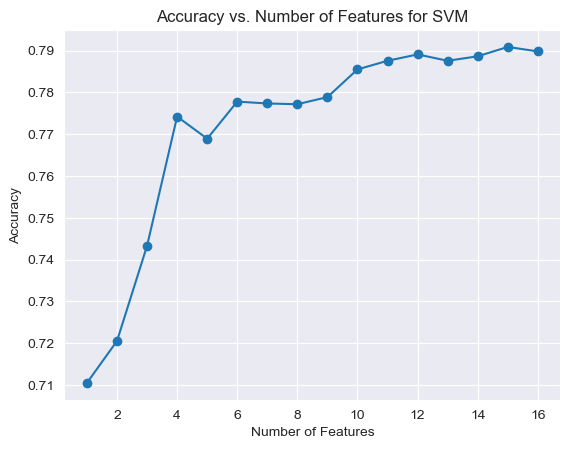

In [59]:
#Plotting the Accuracy values 
#Storing the values as a list 
x_val = list(accuracy_scores.keys())
y_val = list(accuracy_scores.values())

# Plot the data
plt.plot(x_val, y_val, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Features for SVM')
plt.grid(True)
plt.show()

In [47]:
#Storing te values 
accuracy_max_svm, features_svm = max_value_key(accuracy_scores)
print(f'The maximum improved accuacy is {accuracy_max_svm} for {features_svm} features')

The maximum improved accuacy is 0.790901948132204 for [15] features


In [ ]:
#Importing required files 
from sklearn.neural_network import MLPClassifier

# Initialize the dictionary to store accuracy for each number of features
nn_accuracy_scores = {}

# Initialize an empty DataFrame to add features incrementally
X_new_nn = pd.DataFrame()

# Loop through all the features in the order of importance for the Neural Network
for i, feature in enumerate(feature_importances, 1):
    # Add the next most important feature
    X_new_nn[feature] = X[feature]

    # Define the Neural Network model
    nn_model = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', max_iter=200)

    # Perform GridSearchCV with updated features
    grid_search_nn = GridSearchCV(nn_model, param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1]}, cv=5, scoring='accuracy')
    grid_search_nn.fit(X_new_nn, y)

    # Store the best score in the dictionary with the number of features used
    nn_accuracy_scores[i] = grid_search_nn.best_score_

    # Print the accuracy for each step
    print(f"Accuracy with top {i} features for Neural Network:", grid_search_nn.best_score_)

print("Improved Neural Network accuracy across features:", nn_accuracy_scores)


In [32]:
#Now for Random Forest we are having the parameters that will give us the best results, as obtained from above 
'''
Optimal number of features: 9
Selected Features: Index(['age', 'balance', 'housing', 'contact', 'day', 'month', 'duration',
       'pdays', 'poutcome'],
      dtype='object')
'''

# Random Forest model
rf_model = RandomForestClassifier(random_state=35)

# Define the hyperparameter grid
param_grid_rf = {
    'max_depth': [15], # Maximum depth of the tree
    'max_features': [None]  # Number of features to consider at each split
}

# GridSearchCV with 5-fold cross-validation
X_RF = X[['age', 'balance', 'housing', 'contact', 'day', 'month', 'duration','pdays', 'poutcome']]
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_RF, y)

print("Best Random Forest hyperparameters:", grid_search_rf.best_params_)
print("Best Random Forest CV accuracy:", grid_search_rf.best_score_)




Best Random Forest hyperparameters: {'max_depth': 15, 'max_features': None}
Best Random Forest CV accuracy: 0.8102554224912402


In [ ]:
'''
But the accuracy is not satisfactory and thus we will be iterating through all the parameters and 
then add one by one in the increasing order of importance 
'''

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Random Forest model
rf_model = RandomForestClassifier(random_state=35)

# Define the hyperparameter grid with optimal parameters
param_grid_rf = {
    'max_depth': [15],           # Optimal maximum depth of the tree
    'max_features': [None]       # Optimal max features at each split
}

# Array of features in decreasing order of importance (from previous feature selection)
selected_features = ['duration', 'month', 'poutcome', 'day', 'balance', 'contact', 'age', 'housing', 'pdays', 'job', 'campaign', 'education', 'previous', 'marital', 'loan', 'default']

# Initialize a dictionary to store accuracy for each number of features
rf_accuracy_scores = {}

# Initialize an empty DataFrame to add features incrementally
X_new_rf = pd.DataFrame()

# Loop through the features in the order of importance
for i, feature in enumerate(selected_features, 1):
    # Add the next most important feature
    X_new_rf[feature] = X[feature]

    # Perform GridSearchCV with the updated set of features
    grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
    grid_search_rf.fit(X_new_rf, y)

    # Store the best score in the dictionary with the number of features used
    rf_accuracy_scores[i] = grid_search_rf.best_score_

    # Print the accuracy for each step
    print(f"Accuracy with top {i} features for Random Forest:", grid_search_rf.best_score_)

print("Improved Random Forest accuracy across features:", rf_accuracy_scores)


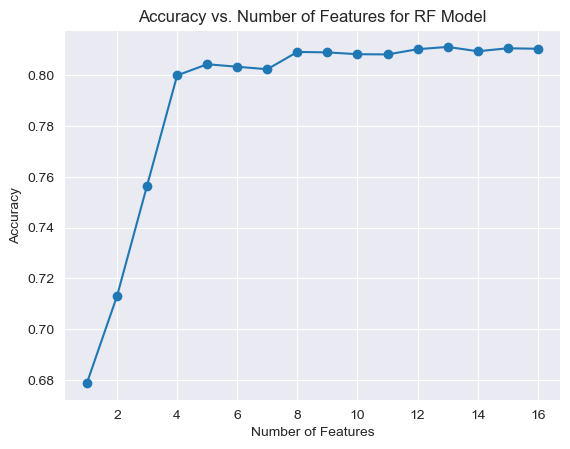

The maximum value of accuracy obtained is 0.8110614326965828


In [58]:
#Plotting the Accuracy values 

#Variables to store the values 
x_val_rf = list(rf_accuracy_scores.keys())
y_val_rf = list(rf_accuracy_scores.values())

# Plot the data
plt.plot(x_val_rf, y_val_rf, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Features for RF Model')
plt.grid(True)
plt.show()
print(f'The maximum value of accuracy obtained is {max(y_val_rf)}' )

In [51]:
#Declaring the variables and storing the results 
max_accuracy_rf, features_rf = max_value_key(rf_accuracy_scores)
print(f'The maximum improved accuracy obtained is {max_accuracy_rf} for {features_rf} features, from the input features :- (duration, month, poutcome, day, balance, contact, age, housing, pdays, job, campaign, education, previous)' )

The maximum improved accuracy obtained is 0.8110614326965828 for [13] features, from the input features :- (duration, month, poutcome, day, balance, contact, age, housing, pdays, job, campaign, education, previous)


In [ ]:
#Importing the necessary files 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Neural Network model with single hidden layer
nn_model = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', max_iter=300, random_state=35)

# Pipeline for scaling and neural network
pipeline_nn = Pipeline([
    ('scaler', StandardScaler()),
    ('nn', nn_model)
])

# Define the hyperparameter grid for the Neural Network
param_grid_nn = {
    'nn__alpha': [0.001],  # Regularization parameter (weight decay)
}

# Array of features in decreasing order of importance
selected_features = ['duration', 'month', 'contact', 'poutcome', 'housing', 'day', 'pdays', 'age', 'loan', 'education', 'campaign', 'job', 'balance', 'previous', 'marital', 'default']

# Initialize a dictionary to store accuracy for each number of features
nn_accuracy_scores = {}

# Initialize an empty DataFrame to add features incrementally
X_new_nn = pd.DataFrame()

# Loop through the features in the order of importance
for i, feature in enumerate(selected_features, 1):
    # Add the next most important feature
    X_new_nn[feature] = X[feature]

    # Perform GridSearchCV with the updated set of features
    grid_search_nn = GridSearchCV(pipeline_nn, param_grid_nn, cv=5, scoring='accuracy')
    grid_search_nn.fit(X_new_nn, y)

    # Store the best score in the dictionary with the number of features used
    nn_accuracy_scores[i] = grid_search_nn.best_score_

    # Print the accuracy for each step
    print(f"Accuracy with top {i} features for Neural Network:", grid_search_nn.best_score_)

print("Improved Neural Network accuracy across features:", nn_accuracy_scores)

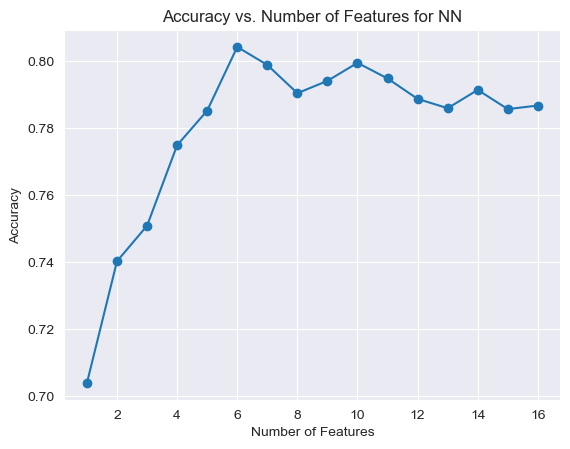

The maximum value of accuracy obtained is 0.8041601860011204


In [91]:
#Plotting the Accuracy values 
x_val_nn = list(nn_accuracy_scores.keys())
y_val_nn = list(nn_accuracy_scores.values())

# Plot the data
plt.plot(x_val_nn, y_val_nn, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Features for NN')
plt.grid(True)
plt.show()
print(f'The maximum value of accuracy obtained is {max(y_val_nn)}' )

In [92]:
#Variables for storing the results 
max_accuracy_nn, features_nn = max_value_key(nn_accuracy_scores)
print(f'The maximum improved accuracy obtained is {max_accuracy_nn} for {features_nn} features :- (duration, month, contact, poutcome, housing, day)' )

The maximum improved accuracy obtained is 0.8041601860011204 for [6] features :- (duration, month, contact, poutcome, housing, day)


In [ ]:
'''
Key Take away :- 
Initial Accuracies of each models :-
1.RBF SVM ==> 0.7898273213623603 for 16 features
2.NN ==> 0.8013826891190629 for 16 features
3.RF ==> 0.8143762429635621 for 16 features

Improved Accuracies :- 
1.RBF SVM ==> 0.790901948132204 for 15 features
2.NN ==> 0.8041601860011204, for 6 features  
3.RF ==> 0.8143762429635621 no improvement 

'''

In [ ]:
## Finally, test a few promising models on the test data. Is the model useful for the business?
#Question 8
#Out of all the three models the Random Forest model is the one which gave us the maximum accuracy 
#Thus we can model the given situation by using the Random Forest Model 

In [86]:
#Importing the files 
from sklearn.model_selection import train_test_split

In [88]:
#Random Forest model 
rf_model = RandomForestClassifier(max_depth = 15, random_state=50)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model.fit(X_train,y_train) #Fitting the model 
test_accuracy = rf_model.score(X_test,y_test) #Getting the accuracy 
print(f'Test Accuracy : {test_accuracy}') #Testing the accuracy of the model 

Test Accuracy : 0.8369905956112853


In [93]:
#Here we will be evaluating the model 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

#Random Forest model 
rf_model = RandomForestClassifier(max_depth = 15, random_state=50)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model on various metrics
accuracy = accuracy_score(y_test, y_pred) #Accuracy 
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' for handling class imbalance
precision = precision_score(y_test, y_pred, average='weighted') #Calculating Precision
recall = recall_score(y_test, y_pred, average='weighted') #Calculating recall

# Print results
print("Evaluation Metrics for Random Forest Model:")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Evaluation Metrics for Random Forest Model:
Accuracy: 0.8369905956112853
F1 Score: 0.8370618133122318
Precision: 0.8385957330249262
Recall: 0.8369905956112853

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      1166
         1.0       0.81      0.86      0.83      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



In [ ]:
'''
As we can see, the model is having an accuracy of 83 percentage, F1 score of 0.837, Precision of 0.8385
and a recall of 0.83699.
Thus the model can be used for the business.
'''

In [ ]:
## See if the model will work if you separate the training and test data in at least two pathological ways:a. All the training calls were in months other than June and July, while the testing was in June and July.If the test results are worse, then speculate on reasons why.
##All the training calls were for professions other than technicians, while testing was on technicians. Is there a profession closest to technician what can be used as a substitute? 
#Question 9
'''
Since I am directly applying the constraints to the normalized data frame, we need to figure out
the normalization values for June, July and for the job technician.
June:
Normalized value  = 5/11
July:
Normalized value  = 6/11

technician: 
Normalized value  = 7/12
'''

In [83]:
#Importing the files 
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model with optimal hyperparameters
rf_model = RandomForestClassifier(max_depth=15, random_state=35)

#Defining normalized variables for comparison 
var_june = 5/11
var_july = 6/11
# Separate the data by month
train_data_month = X[(X['month'] != 5/11) & (X['month'] != 6/11)]
test_data_month = X[(X['month'] == 6/11)]
# Separate the target variable accordingly
y_train_month_rf = y.loc[train_data_month.index]
y_test_month_rf = y.loc[test_data_month.index]

# Train the Random Forest model on non-June/July months
rf_model.fit(train_data_month, y_train_month_rf)

# Evaluate on the June/July test set
test_accuracy_month = rf_model.score(test_data_month, y_test_month_rf)
print("Random Forest test accuracy on June and July data:", test_accuracy_month)


Random Forest test accuracy on June and July data: 0.8540290620871862


In [74]:
# Separate the data by profession

var_job = (7/12) #Variable for storing normalized value of job
train_data_profession = X[X['job'] != var_job]
test_data_profession = X[X['job'] == var_job]
# Separate the target variable accordingly
y_train_profession = y.loc[train_data_profession.index]
y_test_profession = y.loc[test_data_profession.index]

# Train the Random Forest model on non-technician professions
rf_model.fit(train_data_profession, y_train_profession)

# Evaluate on technician test set
test_accuracy_profession = rf_model.score(test_data_profession, y_test_profession)
print("Random Forest test accuracy on technician data:", test_accuracy_profession)

Random Forest test accuracy on technician data: 0.8524410312671421


In [ ]:
'''
The accuracy has improved by a small margin if we restrict our training data and test it on the data set having the excluded entries. 

'''

In [108]:
## Is there a profession closest to technician what can be used as a substitute?
## Give me the intuition behind it and also how to figure out profession closest to technician based on feature similarity ?

import pandas as pd
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import StandardScaler

#The data frame 
df = scaled_final.copy()

# Aggregate data by each profession
grouped = df.groupby('job').mean()

# Extract features for "technician"
technician_features = grouped.loc[7/12].values

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(grouped)

# Get technician's scaled features
technician_scaled = scaled_features[grouped.index.get_loc(7/12)]

# Calculate Euclidean distance from technician to each other profession
distances = {}
for profession, features in zip(grouped.index, scaled_features):
    if profession != 7/12:
        distances[profession] = euclidean(technician_scaled, features)

# Find the profession with the smallest distance (closest match)
closest_profession = min(distances, key=distances.get)
print("The profession closest to technician is:", closest_profession)


The profession closest to technician is: 0.16666666666666669


In [ ]:
'''
From the above calculations, the profession closest to technician is 0.16666666666666669,
which is normalized and encoded.Thus we need to figure out the profession from the number.
Max - Min == 12 for job ==> Closest Profession == 0.16666666666666669*12 - 6 == -4
Thus from the encoding table we can conclude that the job closest to technician is :
self-employed
'''

In [ ]:
'''
Note that all of the conclusions wherever necessary have been given in the immediate cell itself, 
same is the case with references.
'''